In [ ]:
#Preliminary feature selection for Merge Table 1

In [1]:
#import necessary packages 
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick as yb
import warnings
warnings.filterwarnings("ignore")
path = 'MergeTable1_FirmsAndSmWfigs2Round.csv'

In [2]:
df1 = pd.read_csv('MergeTable1_FirmsAndSmWfigs2Round.csv', error_bad_lines=False)

b'Skipping line 4622: expected 136 fields, saw 138\n'
b'Skipping line 18303: expected 136 fields, saw 204\n'
b'Skipping line 25356: expected 136 fields, saw 140\n'


In [3]:
#Identifying the percentage of missing values present in each respective column of the dataframe 
percent_missing = df1.isnull().sum() * 100 / len(df1)
print(percent_missing)

Unnamed: 0             0.000000
latitude               0.000000
longitude              0.002392
brightness             0.002392
scan                   0.002392
                        ...    
init_lat_rounded      99.997608
init_long_rounded     99.995215
disc_date_loc         99.997608
disc_date_hour_loc    99.997608
FIRE_DETECTED          0.011961
Length: 136, dtype: float64


In [4]:
#Drop all columns containing more than 50 null values.
df1drop = df1.dropna(how='all', thresh=50, axis=1)

In [5]:
#Converting daynight and satellite values to numerical values.
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}
df1drop['daynight'] = df1drop['daynight'].map(daynight_map)
df1drop['satellite'] = df1drop['satellite'].map(satellite_map)

In [6]:
#Seperate acq_date column into seperate 'day', 'month', and 'year'columns. 
df1drop['acq_date'] = pd.to_datetime(df1drop['acq_date'])
df1drop['year'] = df1drop['acq_date'].dt.year
df1drop['month'] = df1drop['acq_date'].dt.month
df1drop['day'] = df1drop['acq_date'].dt.day

In [7]:
#Now that we have seperated our 'acq_date' data into day, month, and year columns, we can drop the 'acq_date' column to eliminate redundancy.
df1drop.drop("acq_date", axis=1, inplace=True)

In [8]:
#Drop columns unneccesary to our exploration.
df1drop.drop("instrument", axis=1, inplace=True)
df1drop.drop("date_loc", axis=1, inplace=True)
df1drop.drop("date_hour_loc", axis=1, inplace=True)
df1drop.drop("acq_time", axis=1, inplace=True)
df1drop.drop("type", axis=1, inplace=True)
df1drop.drop("Unnamed: 0", axis=1, inplace=True)
df1drop.drop("latitude", axis=1, inplace=True)
df1drop.drop("longitude", axis=1, inplace=True)

In [9]:
#Create a new dataframe that does not contain null values. 
df1drop = df1drop.dropna()

In [10]:
#Convert data in dataframe to string type to work with Yellowbrick visualizations. 
df1drop1 = df1drop.astype(str)

In [11]:
#Seperate data sets as labels and features.
X = df1drop1.drop('FIRE_DETECTED', axis=1)
y = df1drop1['FIRE_DETECTED']
features = ["brightness", "scan", "track", "satellite", "confidence", "version", "bright_t31", "frp", "daynight", "lat", "long", "hour_x", "day", "month", "year"]

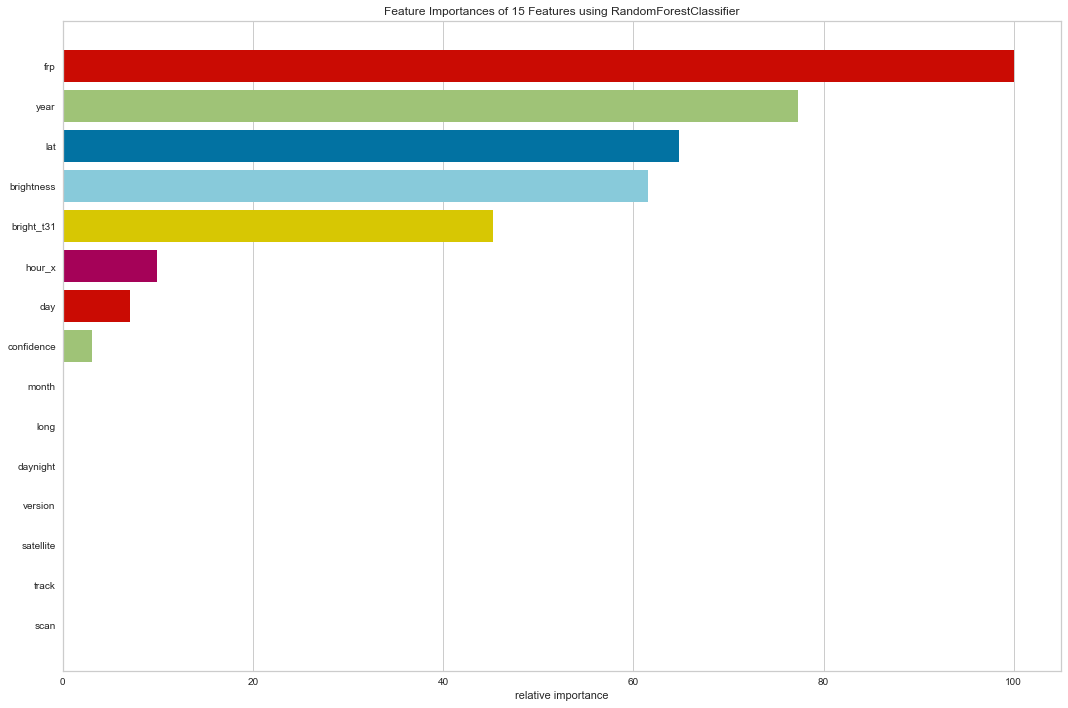

<AxesSubplot:title={'center':'Feature Importances of 15 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [12]:
#Use RandomForestClassifier to plot feature importance for our dataset. As we can see from the output, hour_x, daynight, version, and brightness do not seem to contribute significantly to our model.
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, labels=features, size=(1080, 720))

viz.fit(X, y)

viz.show()

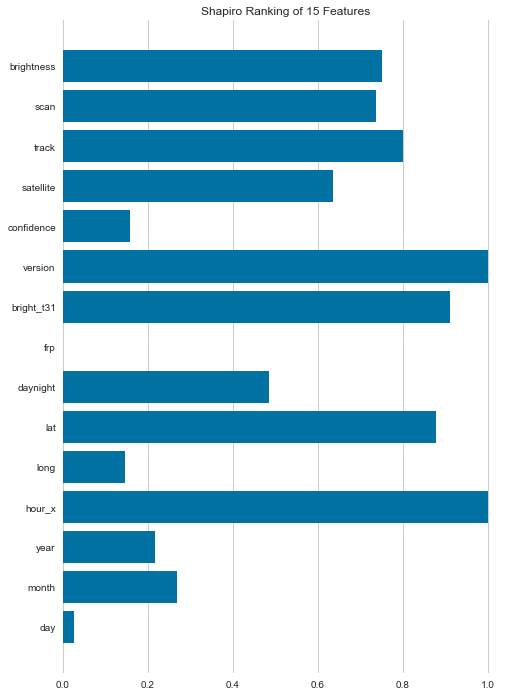

<AxesSubplot:title={'center':'Shapiro Ranking of 15 Features'}>

In [13]:
#Create a Shaprio ranking of our features.
from yellowbrick.features import Rank1D

fig, ax = plt.subplots(1, figsize=(8, 12))
vzr = Rank1D(ax=ax)
vzr.fit(X, y)
vzr.transform(X)
sns.despine(left=True, bottom=True)
vzr.poof()

In [14]:
#Convert data in the dataframe to float type.
df1drop2 = df1drop.astype(float)
df1drop2.head()

,brightness,scan,track,satellite,confidence,version,bright_t31,frp,daynight,lat,long,hour_x,FIRE_DETECTED,year,month,day
0,319.4,1.4,1.2,1.0,98.0,6.03,267.5,38.3,0.0,33.49,-90.21,4.0,0.0,2018.0,1.0,1.0
1,312.5,1.2,1.1,1.0,85.0,6.03,269.1,21.9,0.0,44.38,-119.12,6.0,0.0,2018.0,1.0,1.0
2,309.6,3.9,1.8,1.0,67.0,6.03,284.0,90.7,0.0,19.41,-155.27,9.0,0.0,2018.0,1.0,1.0
3,309.8,4.0,1.9,1.0,68.0,6.03,289.9,82.0,0.0,19.34,-155.05,9.0,0.0,2018.0,1.0,1.0
4,312.8,4.0,1.9,1.0,80.0,6.03,287.1,103.7,0.0,19.39,-155.08,9.0,0.0,2018.0,1.0,1.0


In [15]:
#seperate data sets as labels and features
X = df1drop2.drop('FIRE_DETECTED', axis=1)

y = df1drop2['FIRE_DETECTED']
features = ["brightness", "scan", "track", "satellite", "confidence", "version", "bright_t31", "frp", "daynight", "lat", "long", "hour_x", "day", "month", "year"]

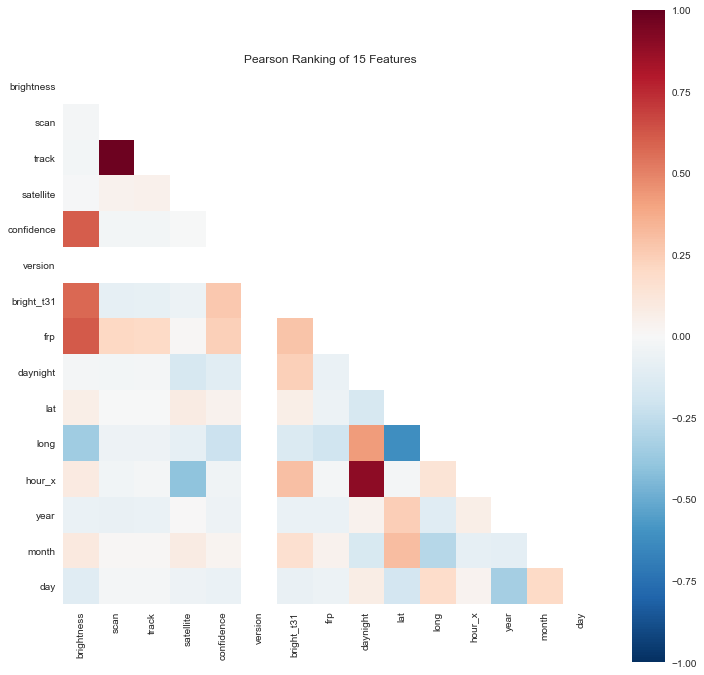

<AxesSubplot:title={'center':'Pearson Ranking of 15 Features'}>

In [16]:
#Use Yellowbrick's Rank2D to create a Pearson ranking of features. 
from yellowbrick.features import Rank2D

fig, ax = plt.subplots(1, figsize=(12, 12))
vzr = Rank2D(ax=ax)
vzr.fit(X, y)
vzr.transform(X)
sns.despine(left=True, bottom=True)
vzr.poof()

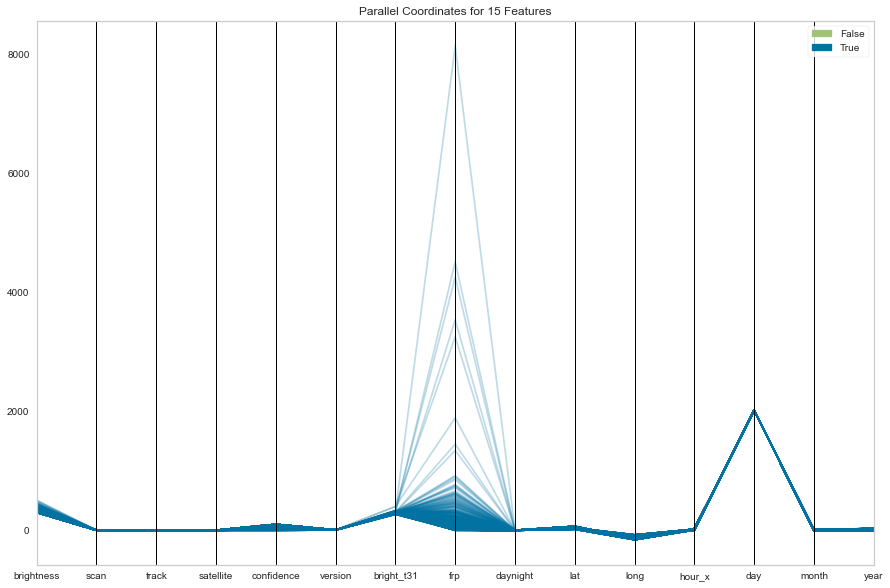

<AxesSubplot:title={'center':'Parallel Coordinates for 15 Features'}>

In [17]:
#Analyze parallel coordinates for our features using Yellowbricks' ParallelCoordinates. 
from yellowbrick.features import ParallelCoordinates
features = ["brightness", "scan", "track", "satellite", "confidence", "version", "bright_t31", "frp", "daynight", "lat", "long", "hour_x", "day", "month", "year"
    ""
]
classes = ["True", "False"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, 
    shuffle=True, size=(1080, 720)
)

# Fit and transform the data to the visualizer
visualizer.fit(X, y)
visualizer.transform(X)

# Finalize the title and axes then display the visualization
visualizer.show()

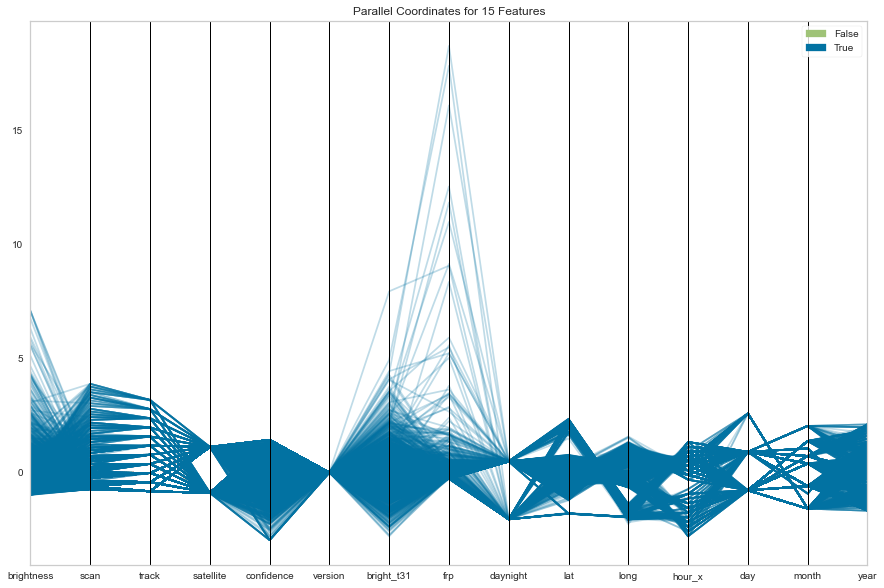

<AxesSubplot:title={'center':'Parallel Coordinates for 15 Features'}>

In [18]:
#Analyze parallel coordinates for our features using Yellowbricks' ParallelCoordinates, using a data normalizer this time. 
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', # This time we'll specify a normalizer
    sample=0.05, shuffle=True, size=(1080, 720)
)

# Fit the visualizer and display it
visualizer.fit(X, y)
visualizer.transform(X)

visualizer.show()

In [19]:
#Analyze feature importance using Sklearn's ExtraTreesClassifier.
from sklearn.ensemble import ExtraTreesClassifier
array = df1drop2.values
X = array[:,0:41663]
Y = array[:,15]
model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X, Y)
print(model.feature_importances_)

[1.36065050e-02 4.68869384e-02 4.26510664e-02 1.81208908e-02
 1.03017908e-02 0.00000000e+00 3.23040032e-02 1.20813588e-02
 9.02226445e-03 5.79972566e-02 7.63928335e-02 9.14916899e-02
 6.45303386e-06 3.52722858e-02 5.59513026e-02 4.97913361e-01]
